<a href="https://colab.research.google.com/github/despygurl/rock-paper-scissors/blob/master/%5BSubmission%5D_rock_paper_scissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyek Akhir Dicoding: Klasifikasi Gambar dengan Tensorflow**


In [ ]:
# Mengecek versi tensorflow
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

2.4.1


In [ ]:
# Loading dataset
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
    -O /tmp/rockpaperscissors.zip

--2021-05-11 15:42:58--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  28.1MB/s    in 11s     

2021-05-11 15:43:09 (27.4 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# Ekstraksi file zip
import zipfile, os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir, 'rps-cv-images')


In [ ]:
os.listdir(base_dir)

['paper', 'rock', 'scissors', 'rps-cv-images', 'README_rpc-cv-images.txt']

In [ ]:
os.listdir(train_dir)

['paper', 'rock', 'scissors', 'README_rpc-cv-images.txt']

In [ ]:
train_datagen = ImageDataGenerator(
                rescale=1. /255,
                rotation_range = 20,
                shear_range = 0.2,
                horizontal_flip=True,
                fill_mode = 'nearest',
                validation_split=0.4)

val_datagen = ImageDataGenerator(
    rescale = 1. /255,
    rotation_range = 20,
    horizontal_flip=True,
    shear_range = 0.2,
    fill_mode = 'nearest',
    validation_split=0.4
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,                  
    target_size = (150,150), 
    batch_size = 4,
    subset='training',
    class_mode = 'categorical'       
)

val_generator = val_datagen.flow_from_directory(
    train_dir,             
    target_size = (150,150),    
    batch_size=4, 
    subset='validation',
    class_mode = 'categorical'       
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
# Membuat Model CNN
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
# Proses compiling.. Menentukan optimizer dan loss function
model.compile(
    loss = 'categorical_crossentropy',   
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['accuracy'] 
)

# Mencetak rangkuman arsitektur model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
class myCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.98):
            print("\nAkurasi telah mencapai 98%. Untuk efisiensi, proses training diakhiri!")
            self.model.stop_training = True

my_call = myCallbacks()

In [ ]:
model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator, 
    shuffle=True,
    verbose=1,
    callbacks = [my_call]
)

Epoch 1/10
329/329 [==============================] - 88s 267ms/step - loss: 0.1243 - accuracy: 0.9612 - val_loss: 0.1762 - val_accuracy: 0.9577
Epoch 2/10
329/329 [==============================] - 87s 265ms/step - loss: 0.1018 - accuracy: 0.9688 - val_loss: 0.1010 - val_accuracy: 0.9714
Epoch 3/10
329/329 [==============================] - 88s 266ms/step - loss: 0.0969 - accuracy: 0.9734 - val_loss: 0.1412 - val_accuracy: 0.9588
Epoch 4/10
329/329 [==============================] - 87s 266ms/step - loss: 0.0853 - accuracy: 0.9718 - val_loss: 0.1138 - val_accuracy: 0.9691
Epoch 5/10
329/329 [==============================] - 88s 266ms/step - loss: 0.0808 - accuracy: 0.9718 - val_loss: 0.1261 - val_accuracy: 0.9611
Epoch 6/10
329/329 [==============================] - 87s 265ms/step - loss: 0.0765 - accuracy: 0.9756 - val_loss: 0.2253 - val_accuracy: 0.9451
Epoch 7/10
329/329 [==============================] - 88s 267ms/step - loss: 0.0722 - accuracy: 0.9741 - val_loss: 0.1228 - val_ac

Saving image_2021-05-11_231743.png to image_2021-05-11_231743.png
image_2021-05-11_231743.png
paper


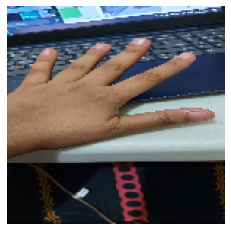

In [ ]:
# Proses memilih gambar lalu resize gambar dan akhirnya diubah menjadi dalam bentuk array oleh numpy

import numpy as np
from google.colab import files  # Akses file via google colab
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

    # Predicting images
    path = fn
    img = image.load_img(path, target_size=(150,150))
    imgplot = plt.imshow(img)

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    plt.axis('off')

    print(fn)
    if classes [0][0]==1:
        print('paper')
    elif classes [0][1]==1:
        print('rock')
    elif classes [0][2]==1:
        print('scissors')
    else:
        print('not in class')